###### <img src="./logo_UTN.svg" align="right" width="150" /> 

### Procesamiento Digital de Señales

## Trabajo Práctico Nº8: Ancho de banda del Electrocardiograma.

### Gabriel Cruz

## Enunciado

En el archivo ECG_TP4.mat encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas a continuación. Replique los gráficos que se muestran a continuación, con la finalidad de estimar el ancho de banda del ECG de una manera alternativa, según se discutió en clase.
##### No importa si no logra clasificar los latidos normales y ventriculares (verdes y azules).

a) Compare los espectros del ECG calculados hasta aquí. Elija un estimador de los que mejor hayan funcionado hasta el momento (Welch o Blackman-Tukey). 1) Realice gráficos donde compare:

a.1) La densidad espectral (PSD ó DEP) de los primeros 10 segundos de ECG limpio

a.2) La PSD de todas las realizaciones de latidos en una ventana que va desde (R_i - 250 ms - R_i + 350 ms) para los i-ésimos latidos.

a.3) La PSD de todo el registro.

¿Qué puede decir acerca de las diferencias? Indique en qué aspecto fundamenta sus observaciones.



b) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a suavidad de los trazos y nivel isoeléctrico nulo.

# Defina la plantilla del filtro

fs0 = ?? # fin de la banda de detenida 0

fc0 = ?? # comienzo de la banda de paso

fc1 = ?? # fin de la banda de paso

fs1 = ?? # comienzo de la banda de detenida 1

### Replicamos graficas

In [21]:
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio
from scipy.io.wavfile import write

from scipy import signal
from scipy.fft import fft, fftshift

from IPython.display import display, Markdown
import pandas as pd

def vertical_flaten(a):

    return a.reshape(a.shape[0],1)

C:\Users\gabri\AppData\Local\Temp\ipykernel_12320\1160402407.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  matriz_ecg_ventanas[:,i] = ecg_one_lead[int(qrs_detecion[i]-R_i_inf) : int(qrs_detecion[i] + R_i_sup)]


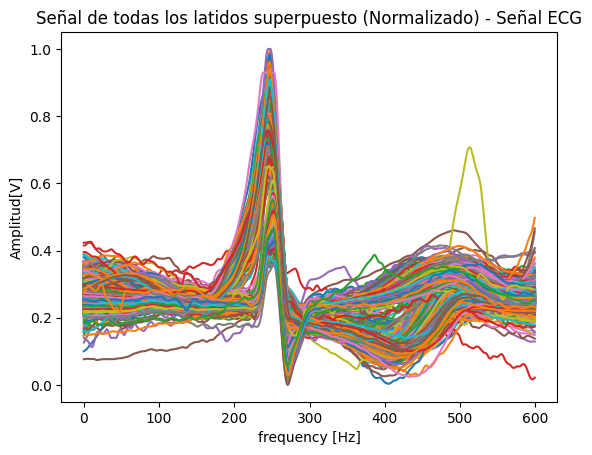

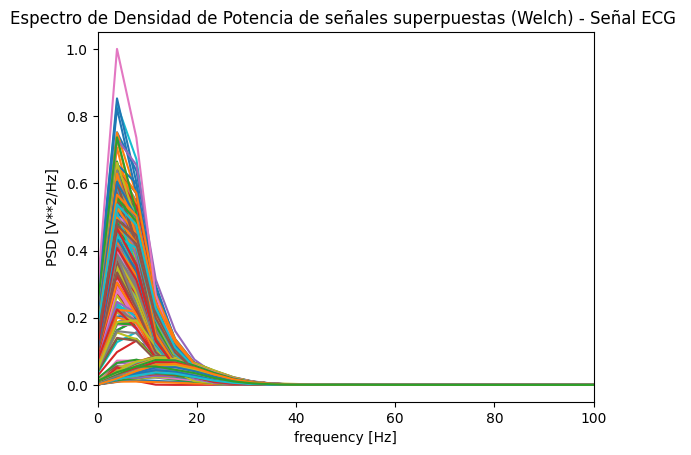

In [22]:
##################
# Lectura de ECG #
##################

fs_ecg = 1000 # Hz

# para listar las variables que hay en el archivo
#io.whosmat('ECG_TP4.mat')
mat_struct = sio.loadmat('./ECG_TP4.mat')

ecg_one_lead = vertical_flaten(mat_struct['ecg_lead'])

N_total = len(ecg_one_lead)

ecg_10s = ecg_one_lead[:10000] #10 segundo de la señal ECG
N = len(ecg_10s)

# Filtrado de frecuencia Nyquist
df = fs_ecg/N 
ff = np.arange(0,fs_ecg,df)
bfrec = ff <= fs_ecg/2 

ventana = 600
R_i_inf = 250
R_i_sup = 350

ecg_one_lead = np.ravel(ecg_one_lead)
qrs_detecion = mat_struct['qrs_detections']
N_det = len(qrs_detecion)

matriz_ecg_ventanas = np.zeros((ventana,N_det))

for i in range(N_det):
    matriz_ecg_ventanas[:,i] = ecg_one_lead[int(qrs_detecion[i]-R_i_inf) : int(qrs_detecion[i] + R_i_sup)]
    matriz_ecg_ventanas[:,i] = matriz_ecg_ventanas[:,i] - np.mean(matriz_ecg_ventanas[:,i])
   
    
matriz_normalizada = (matriz_ecg_ventanas - np.min(matriz_ecg_ventanas)) / (np.max(matriz_ecg_ventanas) - np.min(matriz_ecg_ventanas))    


plt.figure()
plt.plot(matriz_normalizada)
plt.title('Señal de todas los latidos superpuesto (Normalizado) - Señal ECG')
plt.xlabel('frequency [Hz]')
plt.ylabel('Amplitud[V]')

f3, Pxx_matriz_ecg_ventanas = signal.welch(matriz_ecg_ventanas, fs_ecg, nperseg=256, axis=0)

Pxx_matriz_ecg_ventanas_normalizada = (Pxx_matriz_ecg_ventanas - np.min(Pxx_matriz_ecg_ventanas)) / (np.max(Pxx_matriz_ecg_ventanas) - np.min(Pxx_matriz_ecg_ventanas))

plt.figure()
plt.plot(f3, Pxx_matriz_ecg_ventanas_normalizada)
plt.title('Espectro de Densidad de Potencia de señales superpuestas (Welch) - Señal ECG ')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0,100)
plt.show()

En las graficas de arriba podemos observar a las señales de ECG superpuestas cuando se detecta el latido, no se separo los latidos normales de los ventriculares. En el grafico de PSD podemos obervar que toda la energia se concentra en las frecuencias bajas, a simple vista se puede decir que tiene un ancho de banda aproximado de 30Hz. 
Observacion: Comparando el grafico obtenido con el grafico del enunciado hay una pequeña diferencia en el ancho de banda esto puede ser por el metodo usado para obtener la PSD.

### a) Compare los espectros del ECG calculados hasta aquí. Elija un estimador de los que mejor hayan funcionado hasta el momento (Welch o Blackman-Tukey). 1) Realice gráficos donde compare:

Para todos los casos se utilizo el Metodo Welch por su facilidad de uso y fiabilidad de resultados obtenidos.

#### a.1) La densidad espectral (PSD ó DEP) de los primeros 10 segundos de ECG limpio
#### a.3) La PSD de todo el registro.

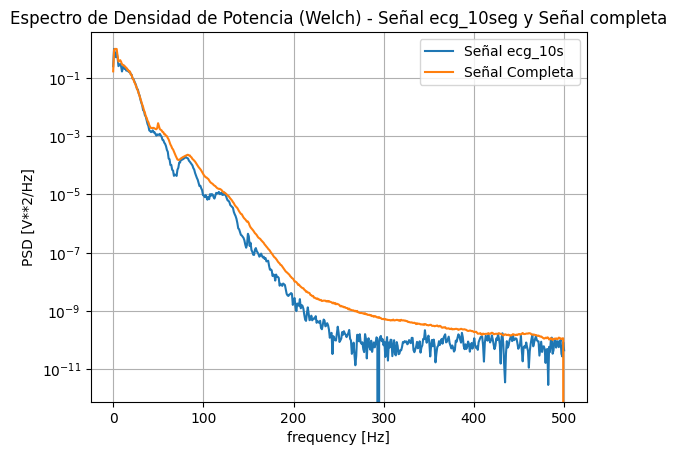

In [23]:
f, Pxx_ecg_10s = signal.welch(ecg_10s, fs_ecg, nperseg=1024 , axis = 0)
# Normalizar por la potencia total

Pxx_normalizado = (Pxx_ecg_10s - np.min(Pxx_ecg_10s)) / (np.max(Pxx_ecg_10s) - np.min(Pxx_ecg_10s))    

f2, Pxx_ecg_one_lead = signal.welch(ecg_one_lead, fs_ecg, nperseg=1024 , axis = 0)
# Normalizar por la potencia total

Pxx_normalizado_2 = (Pxx_ecg_one_lead - np.min(Pxx_ecg_one_lead)) / (np.max(Pxx_ecg_one_lead) - np.min(Pxx_ecg_one_lead))

plt.figure()
plt.semilogy(f, Pxx_normalizado, label = 'Señal ecg_10s')
plt.semilogy(f2, Pxx_normalizado_2, label= 'Señal Completa')
plt.title('Espectro de Densidad de Potencia (Welch) - Señal ecg_10seg y Señal completa')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.legend()
plt.show()

En el grafico de arriba podemos observar la comparacion entre la señal de los primeros 10 segundos de duracion y la señal completa. Se puede observar que la frecuencia fundamental es igual para las dos señales. En la señal de los primeros 10 segudos no se realizo un esfuerzo por lo que en frecuencias mas altas tienen menos energia que en la señal completa que contiene estas señales.

#### a.2) La PSD de todas las realizaciones de latidos en una ventana que va desde (R_i - 250 ms - R_i + 350 ms) para los i-ésimos latidos.

C:\Users\gabri\AppData\Local\Temp\ipykernel_12320\1803192660.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


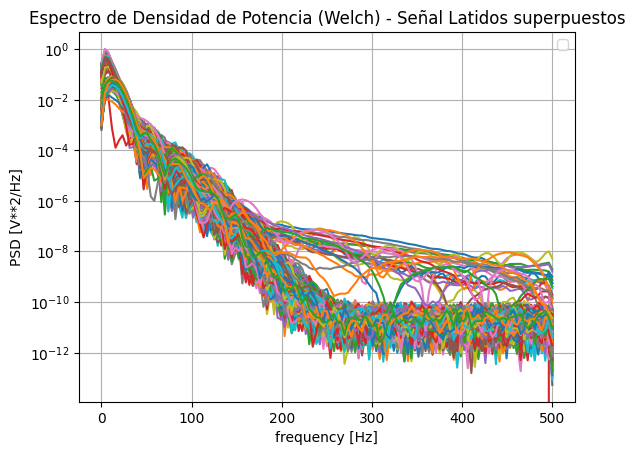

In [24]:
Pxx_normalizado_3 = (Pxx_matriz_ecg_ventanas - np.min(Pxx_matriz_ecg_ventanas)) / (np.max(Pxx_matriz_ecg_ventanas) - np.min(Pxx_matriz_ecg_ventanas))  

plt.figure()
plt.semilogy(f3, Pxx_normalizado_3)
plt.title('Espectro de Densidad de Potencia (Welch) - Señal Latidos superpuestos')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.legend()
plt.show()

En el grafico de arriba podemos observar la PSD de todos los latidos superpuestos. Se puede obsevar que es similar a la señal de 10 segundos de duracion y a la señal completa.

#### ¿Qué puede decir acerca de las diferencias? Indique en qué aspecto fundamenta sus observaciones.

Las diferencias se deben a que en las señal de 10 segundos al no haber un esfuerzo las frecuencia mas altas tiene menos energia y eso se ve claramente cuando se la compara con la señal completa que abarca los tiempos de esfuerzo a los que se sometio al paciente.

#### b) Establezca una plantilla de diseño para los filtros digitales que necesitará para que la señal de ECG se asemeje a los latidos promedio en cuanto a suavidad de los trazos y nivel isoeléctrico nulo.

##### Defina la plantilla del filtro

fs0 = ?? # fin de la banda de detenida 0

fc0 = ?? # comienzo de la banda de paso

fc1 = ?? # fin de la banda de paso

fs1 = ?? # comienzo de la banda de detenida 1

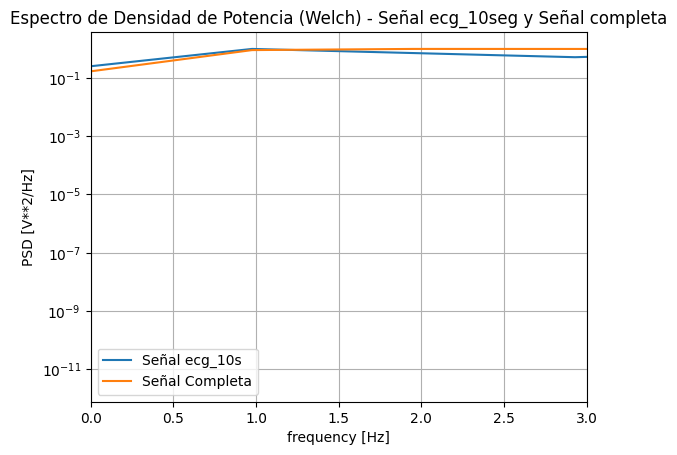

In [25]:
plt.figure()
plt.semilogy(f, Pxx_normalizado, label = 'Señal ecg_10s')
plt.semilogy(f2, Pxx_normalizado_2, label= 'Señal Completa')
plt.title('Espectro de Densidad de Potencia (Welch) - Señal ecg_10seg y Señal completa')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.legend()
plt.xlim(0,3)
plt.show()

Para definir la frecuencia de stop y frecuencia de paso de la frecuencias inferiores se realizo un zoom para definir que las frecuencias del filtro. Frecuencia de stop de 0.1Hz y Frecuencia de paso de 0.5Hz para darle un margen en la banda de paso. En este caso vamos a tener una pendiente de atenuacion muy pronuncida.

In [26]:
N_1 = len(Pxx_ecg_one_lead)

# Calcular el rango de frecuencias
rango_f = f[-1] - f[0]  # Rango total de frecuencias de 0 a 500Hz en este cso

# Calcular la energía total usando np.sum
energia_total = np.sum(Pxx_ecg_one_lead) * (rango_f / N_1)

# Mostrar el resultado
print(f'Energía total de la señal: {energia_total}')

umbral = 0.98
energia_umbral = umbral * energia_total

energia_acumulada = np.cumsum(Pxx_ecg_one_lead) * (f[1] - f[0])
indices_ancho_banda = np.where(energia_acumulada >= energia_umbral)[0]

f_inferior = f[0]  # Frecuencia mínima
f_superior = f[indices_ancho_banda[0]]  # Frecuencia hasta el umbral
ancho_banda = f_superior - f_inferior
print(f'Ancho de banda: {ancho_banda} Hz')


N_1 = len(Pxx_ecg_10s)

# Calcular el rango de frecuencias
rango_f = f[-1] - f[0]  # Rango total de frecuencias de 0 a 500Hz en este cso

# Calcular la energía total usando np.sum
energia_total = np.sum(Pxx_ecg_10s) * (rango_f / N_1)

# Mostrar el resultado
print(f'Energía total de la señal: {energia_total}')

umbral = 0.98
energia_umbral = umbral * energia_total

energia_acumulada = np.cumsum(Pxx_ecg_10s) * (f[1] - f[0])
indices_ancho_banda = np.where(energia_acumulada >= energia_umbral)[0]

f_inferior = f[0]  # Frecuencia mínima
f_superior = f[indices_ancho_banda[0]]  # Frecuencia hasta el umbral
ancho_banda = f_superior - f_inferior
print(f'Ancho de banda: {ancho_banda} Hz')

Energía total de la señal: 9441021.442495126
Ancho de banda: 27.34375 Hz
Energía total de la señal: 7407071.150097465
Ancho de banda: 27.34375 Hz


Para obtener las frecuencias de paso y de stop de las frecuencia superior se realizo una estimacion de ancho de banda en la señal de los primeros 10 segundo de duracion y en las señales superpuestas para realizar una comparacion y las dos estimaciones dieron parecido. Unos 27.3Hz de ancho de banda.
Por lo tanto, la frecuencia de paso es de 27.3Hz y la frecuencia de stop puede ser de 35Hz para no tener una pendiente de atenuacion muy exigente.

In [27]:
data = {
    'Parametro': ['fs0','fc0','fc1','fs1'],
    'Frecuencia [Hz]': [0.1,0.5,27.3,35]
}
df = pd.DataFrame(data)
display(Markdown("### Defiño de la plantilla del filtro"))

display(df)

### Defiño de la plantilla del filtro

,Parametro,Frecuencia [Hz]
0,fs0,0.1
1,fc0,0.5
2,fc1,27.3
3,fs1,35.0
